# Домашняя работа №2

In [275]:
import pandas as pd
import scipy.stats as sts
import numpy as np
import math

import seaborn as sns
from sklearn import datasets
from matplotlib import pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

## Генеральная совокупность и выборка

- Чем отличается генеральная совокупность от выборки?

Генеральная совокупность - совокупность всех объектов, у которых требуется изучить  какой-либо количественный или качественный признак.<br>
Т.к. изучение всей совокупности невозможно, либо затратно, то на практике изучают часть генеральной совокупности:<br>
выборку - отобранную для изучения часть генеральной совокупности.

- Если размер выборки больше 200, то такая выборка является репрезентативной?

В общем случае ответить на данный вопрос нельзя. Выборка является репрезентативной, если она хорошо представляет генеральной совокупность. Что зависит, не только от ее объема, объема генеральной совокупности, но и от того, как эта выборка формировалась, параметров генеральной совокупности и т.д. Объема данной выборки может хватить для относительно небольших групп (студенты института, рабочие завода и т.д.), но для более больших масштабов (город, регион, страна) данного объема уже не хватит.

- Измерили длину волос футболистов сборной Франции на ЧМ-2018. Что могло являться генеральной совокупностью? Приведите 3 примера.

Генеральная совокупность: <br>
1) Делегация сборной Франции, включая футболистов, тренеров и т.д. <br>
2) Футболисты группы в которую входила сборная Франции. <br>
3) Футболисты всех сборных, принявших участие в ЧМ-2018

- Пусть генеральная совокупность --- вес детей, родившихся в Волгограде за последние 10 лет. Предложите 2 стратегии, как сгенерировать выборку.

I. Разделяем выборку по годам и полу и из каждой группы случайым образом формируем выборку. Затем объединяем полученный выборки для дальнейшего изучения.<br>
II. Разделяем выборку по роддомам и полу и из каждой группы случайым образом формируем выборку. Затем объединяем полученный выборки для дальнейшего изучения.

## Параметры центра и разброса

- Постройте распределение, у которого отсутствует мода.


Text(0.5,0,'$x$')

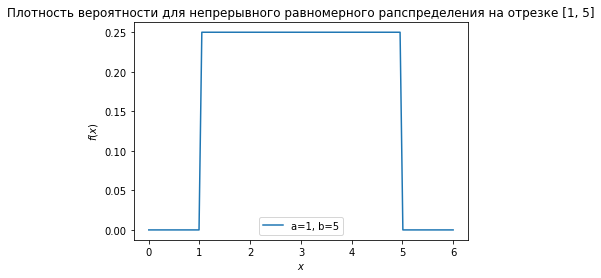

In [276]:
# У равномерного распределения на отрезке, все значения, принадлежащие данному отрезку -
# равновероятны. Соответственно, можно сказать, что у данного распределения отсутствует
# мода, либо можно сказать, что любое значение на отрезке является модой.

uniform_rv = sts.uniform(1, 4)
x = np.linspace(0, 6, 110)
uniform_pdf = uniform_rv.pdf(x)

plt.plot(x, uniform_pdf)


plt.title('Плотность вероятности для непрерывного равномерного рапспределения на отрезке [1, 5]')
plt.legend(['a=1, b=5'])
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

- Какая из статистик (медиана, матожидание) будет наиболее неустойчивой при выбросах? Проверить на выборке из Гамма-распределения. 

In [277]:
# Матожидание - более неустойчивое к выбросам, чем медиана.
# Т.к. при появлении выбросов, медиана смещается на количество 
# выбросов в вариационном ряду. Что не должно сильно изменить
# ее значение. В то время как средневзвешенное значение (мат. ожид.)
# может сильно измениться с появлением выбросов.


n = 51
gamma_rv = sts.gamma(3, 1)
sample = gamma_rv.rvs(n)
sample.sort()
med = np.median(sample)
mean = sample.mean()

In [278]:
overshoot = [18, 20, 22]

sample_with_overshoot = np.append(sample, overshoot)
sample_with_overshoot.sort()
new_mean = sample_with_overshoot.mean()
new_med = np.median(sample_with_overshoot)

print(f'Мат. ожидание без выброса/с выбросом \t{mean:.5f} / {new_mean:.5f}')
print(f'Разница мат. ожиданий \t\t\t{(new_mean - mean):.5f}\n')
print(f'Медиана без выброса/с выбросом \t\t{med:.5f} / {new_med:.5f}')
print(f'Разница медиан \t\t\t\t{(new_med - med):.5f}')

Мат. ожидание без выброса/с выбросом 	3.94722 / 4.83904
Разница мат. ожиданий 			0.89182

Медиана без выброса/с выбросом 		3.49476 / 3.77005
Разница медиан 				0.27528


- Как изменится матожидание, если к выборке добавить константу $C$? Умножить на $C$. 

Проверите на выборке из распределения Пуассона

In [306]:
# Если к выборке добавить константу 𝐶, мат. ожидание изменится на C (MX + C).
# Если выборку умножить на константу 𝐶, мат. ожидание изменится в C раз (MX*C).

pois_rv = sts.poisson(2)
sample = pois_rv.rvs(100)
C = 0.5
#your code here
mean = sample.mean()
mean_with_c = (sample + C).mean()
mean_mult_c = (sample*C).mean()

print(f'Мат. ожидание выборки \t\t{mean}')
print(f'Мат. ожидание выборки + {C} \t{mean_with_c}')
print(f'Мат. ожидание выборки * {C} \t{mean_mult_c}')

Мат. ожидание выборки 		1.97
Мат. ожидание выборки + 0.5 	2.47
Мат. ожидание выборки * 0.5 	0.985


- Как изменится дисперсия при добавлении выбросов? Проверьте для распределения экспоненциального распределения

In [280]:
# Дисперсия значительно увеличивается с добавлением выбросов

exp_rv = sts.expon(4)
sample = exp_rv.rvs(50)
var = sample.var()


#your code here
overshoot = [12, 15]
sample_with_overshoot = np.append(sample, overshoot)
new_var = sample_with_overshoot.var()

print(f'Дисперсия без выбросов / с выбросом \t{var:.4f} / {new_var:.4f}')

Дисперсия без выбросов / с выбросом 	1.0146 / 3.7240


- Что шире: интерквантильный размах ($X_{0.75} - X_{0.25}$) или $(\bar{X}-s, \bar{X}+s)$ для $\mathcal{N}(a, \sigma^2)$. Посчитайте и сравните эти интервалы для распредения $\mathcal{N}(3,1)$

Т.к. интерквантильный размах включает в себя 50% значений, а интервал в 1 сигму $\approx$ 68%.<br>
То интервал $(\bar{X}-s, \bar{X}+s)$ будет шире.



In [281]:
norm_rv = sts.norm(3,1)
sample = norm_rv.rvs(1000)

IQR = sts.iqr(sample)
one_sigma_range = 2*sample.var()**0.5
print(fr'Интерквантильный размах {IQR}')
print(f'Интервал \u00B1\u03C3 \t\t{one_sigma_range}')

Интерквантильный размах 1.4488649591502338
Интервал ±σ 		2.140855660614104


## Основные статистики и ЦПТ

- Что такое статистика? Посчитайте любую для бета-распределения (1,3)

In [282]:
# Статистика - это некоторя функция от результатов наблюдений над случайной величиной выборки.
# Например: выборочное среднее, исправленная выборочная дисперсия, медиана.

n = 50
beta_rv = sts.beta(1,3)
sample = beta_rv.rvs(n)
sample.sort()
mean = np.sum(sample)/len(sample)
s_sq = np.sum([(x-mean)**2 for x in sample])/(n-1)
median = (sample[n//2-1]+sample[n//2])/2

# Или:
# mean = sample.mean(), 
# s_sq = sample.var(ddof=1), 
# median = np.median(sample)

print('{:<35} {:.5f}'.format('Выборочное среднее', mean))
print('{:<35} {:.5f}'.format('Исправленная выборочная дисперсия', s_sq))
print('{:<35} {:.5f}'.format('Медиана', median))

Выборочное среднее                  0.24682
Исправленная выборочная дисперсия   0.04274
Медиана                             0.16532


- Какие статистики являются оценками матожидания, медианы и дисперсии? Посчитайте их для гамма-распределения с параметрами (2, 2)

In [283]:
# Оценкой мат. ожидания является выборочное среднее, медианы - медиана выборки,
# дисперсии - выборочная дисперсия (или исправленная выборочная дисперсия).

gamma_rv = sts.gamma(2,2)
sample = gamma_rv.rvs(50)

#your code here
mean = sample.mean()
var = sample.var(ddof=1)
med = np.median(sample)
print('{:<35} {:.5f}'.format('Выборочное среднее', mean))
print('{:<35} {:.5f}'.format('Исправленная выборочная дисперсия', var))
print('{:<35} {:.5f}'.format('Медиана', med))

Выборочное среднее                  4.06788
Исправленная выборочная дисперсия   2.29332
Медиана                             3.71988


- Какое распределение имеет $\bar{X}$ по ЦПТ? Если исходное распределение $\mathcal{N}(5, 2)$. Сгенерировать выборки размером 50 из этого распределения и проверить. (построить распределение средних)

 $\bar{X}$ по ЦПТ имеет распределение $\mathcal{N}(MX, SE^2)$, где $SE^2=\dfrac{s}{\sqrt{n}}$ или $SE^2=\dfrac{\sigma}{\sqrt{n}}$

Text(0.5,0,'$x$')

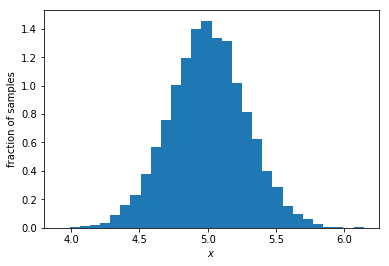

In [284]:
norm_rv = sts.norm(5,2)
results = []

for i in range(10000):
    sample = norm_rv.rvs(50)
    results.append(sample.mean())
    
plt.hist(results, density=True, bins=30)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

- Сгенерируйте выборки так, чтобы ЦПТ не выполнялось (распределение средних не было похоже нормальное)

Text(0.5,0,'$x$')

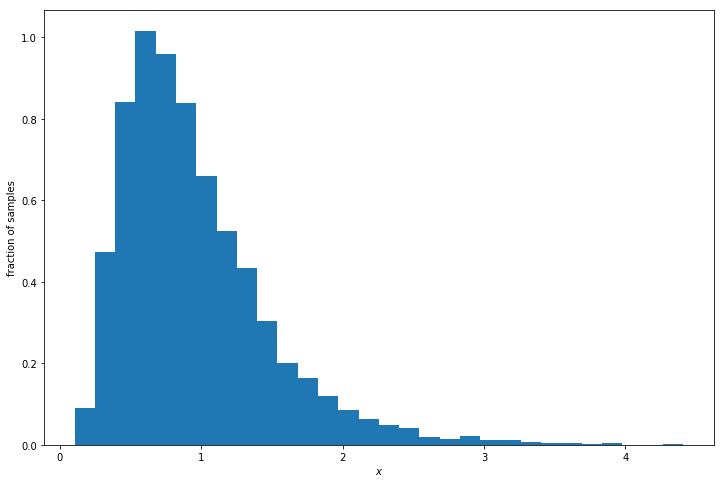

In [285]:
#your code here
results = []
n = 25
expon_rv = sts.expon(3)
for i in range(10000):
    x = expon_rv.rvs(n)
    results.append(x.var())

plt.figure(figsize=(12,8))
plt.hist(results, density=True, bins=30)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

- Сделайте z-преобразование для данного распределения

Распределение sts.expon(3) имеет сдвиг loc=3 соответствует плотности распределения $f(x) = e^{-(x-3)}$<br>
Соответственно $\lambda = 1$, $\mu = \dfrac{1}{\lambda} + loc$,  $\sigma = \dfrac{1}{\lambda}$<br>
Для того, чтобы привести распределение к стандартному виду, нужно передать в pdf функцию аргумент x+3

Text(0.5,0,'$x$')

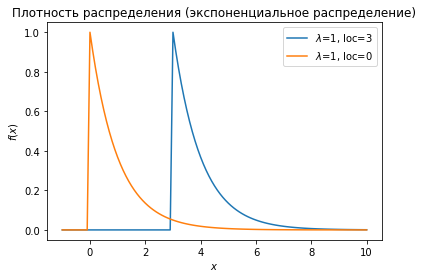

In [286]:
expon_rv = sts.expon(3)
x = np.linspace(-1, 10, 111)
expon_pdf_1 = expon_rv.pdf(x)
expon_pdf_2 = expon_rv.pdf(x+3)

plt.plot(x, expon_pdf_1)
plt.plot(x, expon_pdf_2)

plt.title('Плотность распределения (экспоненциальное распределение)')
plt.legend(['$\lambda$=1, loc=3',  '$\lambda$=1, loc=0'])
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

Для случая sts.expon(loc=3,scale=3) распределение имеет сдвиг loc=3 и $\lambda = \dfrac{1}{scale}$ соответствует плотности распределения $f(x) = \dfrac{1}{scale}\cdot e^{-\dfrac{x-loc}{scale}}$<br>
Соответственно $\lambda = 1$, $\mu = \dfrac{1}{\lambda} + loc$,  $\sigma = \dfrac{1}{\lambda}$<br>
Для того, чтобы привести распределение к стандартному виду, нужно передать в pdf функцию аргумент 3*x+3 и умножить ее на 3

Text(0.5,0,'$x$')

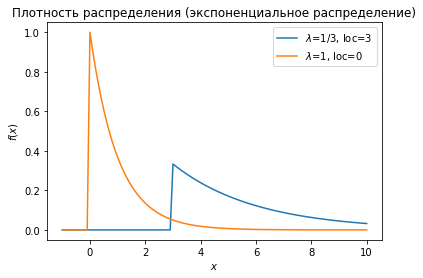

In [287]:
expon_rv_2 = sts.expon(loc=3,scale=3)

expon_pdf_3 = expon_rv_2.pdf(x)
expon_pdf_4 = expon_rv_2.pdf(3*x+3)*3

plt.plot(x, expon_pdf_3)
plt.plot(x, expon_pdf_4)

plt.title('Плотность распределения (экспоненциальное распределение)')
plt.legend(['$\lambda$=1/3, loc=3',  '$\lambda$=1, loc=0'])
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

## Доверительные интервалы и гипотезы

В данных задачах используйте встроенную функцию, позволяющую искать квантили случайной величины **your_rv**.ppf, а также https://gallery.shinyapps.io/dist_calc/ для визуальной картины

- Постройте 90% доверительный интервал для среднего значения $\mathcal{\chi^2_{10}}$.

In [288]:
chi2_rv = sts.chi2(df=10)
n = 50
sample = chi2_rv.rvs(50)
mean = sample.mean()
z = sts.norm.ppf(1-0.05/2)
SE = (sample.var(ddof=1)/n)**0.5
print(f'z = {z:.5f}')
print(f'sampling_mean = {mean:.5f}')
print(f'SE = {SE:.5f}')

z = 1.95996
sampling_mean = 9.99372
SE = 0.53542


In [289]:
print(f'Доверительный интервал 95% для среднего значения: (\
{(mean-z*SE):.5f}, {(mean+z*SE):.5f})')

Доверительный интервал 95% для среднего значения: (8.94432, 11.04313)


- Постройте ДИ для распределения Стьюдента с df = 15 уровня доверия 90%  и 95%. Какой интервал шире?

In [290]:
t_rv = sts.t(df=15)

t90 = t_rv.ppf(1-0.1/2)
t95 = t_rv.ppf(1-0.05/2)
n = 16

print(f'для 90% t = {t90:.5f}')
print(f'для 95% t = {t95:.5f}')

для 90% t = 1.75305
для 95% t = 2.13145


In [291]:
sample = t_rv.rvs(n)
mean = sample.mean()
SE = (sample.var(ddof=1)/n)**0.5
print(f'mean = {mean:.5f}')
print(f'SE = {SE:.5f}')

mean = 0.05483
SE = 0.30973


In [292]:
print(f'Доверительный интервал 90% для среднего значения: (\
{(mean-t90*SE):.5f}, {(mean+t90*SE):.5f})')
print(f'Доверительный интервал 95% для среднего значения: (\
{(mean-t95*SE):.5f}, {(mean+t95*SE):.5f})')

Доверительный интервал 90% для среднего значения: (-0.48814, 0.59781)
Доверительный интервал 95% для среднего значения: (-0.60534, 0.71501)


Доверительный интервал 95% - шире, т.к. содержит большее количество значений.

- Сгенерируйте 2 выборки с одинаковыми параметрами, отличающиеся в 2 раза по размеру. Постройте 2 90% ДИ. Чем они отличаются? Распределение $\mathcal{N}(0,2)$ 

In [293]:
norm_rv = sts.norm(0, 2)
z = sts.norm.ppf(1-0.1/2)
n1 = 50
n2 = 100
sample_1 = norm_rv.rvs(n1)
sample_2 = norm_rv.rvs(n2)
mean_1 = sample_1.mean()
mean_2 = sample_2.mean()
SE_1 = (sample_1.var(ddof=1)/n1)**0.5
SE_2 = (sample_2.var(ddof=1)/n2)**0.5
#your code here
print(f'mean_1 = {mean_1:.5f}\nmean_2 = {mean_2:.5f}')
print(f'SE_1 = {SE_1:.5f}\nSE_2 = {SE_2:.5f}\nz = {z:.5f}')


mean_1 = -0.11088
mean_2 = 0.31310
SE_1 = 0.30378
SE_2 = 0.20389
z = 1.64485


In [294]:
print(f'Доверительный интервал 90% выборки объемом 50: ({mean_1-z*SE_1:.5f}, {mean_1+z*SE_1:.5f})\n')
print(f'Доверительный интервал 90% выборки объемом 100: ({mean_2-z*SE_2:.5f}, {mean_2+z*SE_2:.5f})')

Доверительный интервал 90% выборки объемом 50: (-0.61056, 0.38879)

Доверительный интервал 90% выборки объемом 100: (-0.02227, 0.64847)


Доверительный интервал большей выборки - уже, т.к. за счет большего количества элементов существенной уменьшается стандартная ошибка средних. Также интервал у большей выборки более симметричен относительно 0. Т.к., чем больше количество элементов в выборке, тем лучше выборочное среднее приближает мат. ожидание генеральной совокупности.

- Пусть $H_0: M=100$. Мы получили $p = 0,12$ и не смогли отклонить нулевую гипотезу. Однако позже выяснилось, что среднее в генеральной совокупности равняется 114. Ошибку какого рода мы допустили?

Ошибка второго рода - приняли неверную гипотезу.

#### Какие рассуждения относительно p-value верные?

- Если p уровень значимости равен 0,003, то вероятность того, что верна нулевая гипотеза также равняется  0,003.
- Если бы в исследовании мы получили $p=0,9$, это означало бы, что верна нулевая гипотеза.
- Чем меньше p уровень значимости, тем сильнее получаемые различия.


1) Неверно. Уровень значимости p = 0,003 означает, что при условии, что гипотеза $H_0$ верна: нет различий c генеральной совокупностью. Вероятность получить такие же или большие различия случайно составляет 0,003.<br>
2) Вернее сказать, что нет оснований отвергать гипотезу $H_0$.<br>
3) Из $p_2 > p_1$ не следует, что гипотеза с $p_2$ вероятнее, чем с $p_1$.

- Какое $p$-value будете использовать, если отклонять $H_0$ рисковано: $0.05$ или $0.01$? Является ли 99\% доверительный интервал хорошей оценкой в общем случае?

В данном случае следует использовать $p$-value = 0.01, т.к. в этом случае интервал принятия гипотезы $H_0$ будет шире. В общем случае, так делать не стоит, т.к. увеличивается вероятность ошибки II-го рода (принятие неправильной гипотезы).

## Стьюдент и корреляция

- Изобразите графики плотности распределения Стьюдента для нескольких значений df= (5,10, 20, 40) и $\mathcal{N}(0,1)$. В чем отличия?

При увеличении числа степеней свободы, распределение Стьюдента стремится к стандартному нормальному распределению. Отличие соостоит в том, что чем меньше число степеней свободы, тем выше хвосты у распределения
стьюдента (т.к. выше дисперсия) и ниже экстремум.

Text(0.5,0,'$x$')

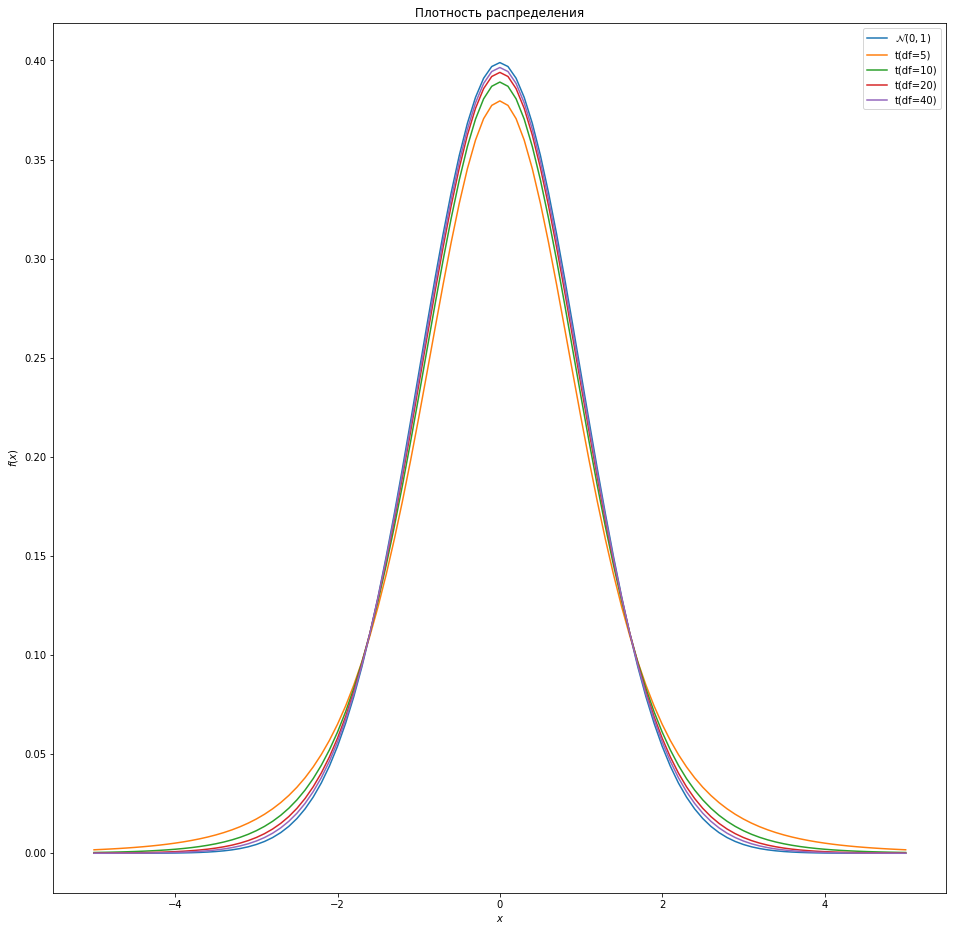

In [295]:
norm_rv = sts.norm(0, 1)
t_rv_1 = sts.t(df = 5)
t_rv_2 = sts.t(df = 10)
t_rv_3 = sts.t(df = 20)
t_rv_4 = sts.t(df = 40)

x = np.linspace(-5, 5, 101)

norm_pdf = norm_rv.pdf(x)
t_pdf_1 = t_rv_1.pdf(x)
t_pdf_2 = t_rv_2.pdf(x)
t_pdf_3 = t_rv_3.pdf(x)
t_pdf_4 = t_rv_4.pdf(x)

plt.figure(figsize=(16,16))
plt.plot(x, norm_pdf)
plt.plot(x, t_pdf_1)
plt.plot(x, t_pdf_2)
plt.plot(x, t_pdf_3)
plt.plot(x, t_pdf_4)

plt.title('Плотность распределения')
plt.legend(['$\mathcal{N}(0,1)$', 't(df=5)',  't(df=10)', 't(df=20)', 't(df=40)'])
plt.ylabel('$f(x)$')
plt.xlabel('$x$')

- Постройте две выборки, чтобы их корреляция была равна -1. Изобразите зависимость на графике.

In [296]:
df = pd.DataFrame({'a': np.linspace(0, 10, 1001), 'b': [i for i in range(1001)[::-1]]})
df.head()

,a,b
0,0.00,1000
1,0.01,999
2,0.02,998
3,0.03,997
4,0.04,996


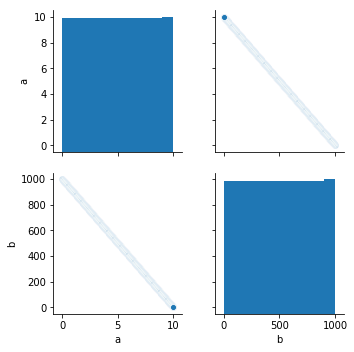

In [297]:
sns.pairplot(df, vars=['a', 'b',],
                 kind='scatter')  

In [298]:
corr = df.corr()
corr

,a,b
a,1.0,-1.0
b,-1.0,1.0


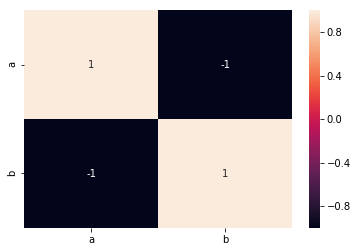

In [299]:
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

- Постройте две выборки, чтобы их корреляция была равна 0. Изобразите зависимость на графике.

In [300]:
df = pd.DataFrame({'a': np.cos([i for i in range(1001)]), 'b': np.sin([i for i in range(1001)])})

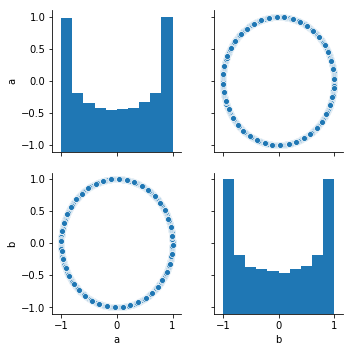

In [301]:
sns.pairplot(df, vars=['a', 'b',],
                 kind='scatter') 

In [302]:
corr = df.corr()
corr

,a,b
a,1.000000,0.000901
b,0.000901,1.000000


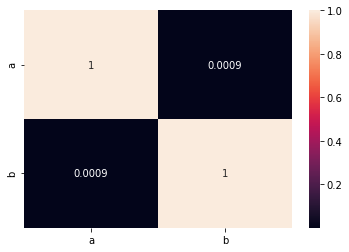

In [303]:
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

- Сгенерируйте 2 выборки из $\mathcal{N}(4,2)$, посчитайте их общий ранг и сумму рангов в каждой выборке.

In [304]:
norm_rv = sts.norm(4,2)
n1 = n2 = 100
n = n1 + n2
sample_1 = norm_rv.rvs(n1)
sample_2 = norm_rv.rvs(n2)
sample = np.concatenate((sample_1, sample_2))
sample.sort()
rank_1 = sum(i for i in range(n) if sample[i] in sample_1)
rank_2 = sum(i for i in range(n) if sample[i] in sample_2)
rank = rank_1 + rank_2

print(f'Сумма рангов выборки 1: \t{rank_1}')
print(f'Сумма рангов выборки 2: \t{rank_2}')
print(f'Общий ранг: \t\t\t{rank}')

Сумма рангов выборки 1: 	10236
Сумма рангов выборки 2: 	9664
Общий ранг: 			19900


In [305]:
#проверка
n*(n-1)/2

19900.0